In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt

# ARIMA

In [5]:
air = pd.read_csv('airline-passengers.csv',index_col='Month',parse_dates=True)
air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
def test_stationarity(timeseries):

#Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling (window =12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    original= plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')

    
    print('Results of Dickey-Fuller Test: \n')
    df_test = adfuller (timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 
                                                 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s) '%i] =j
    print(my_output)

Results of Dickey-Fuller Test: 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


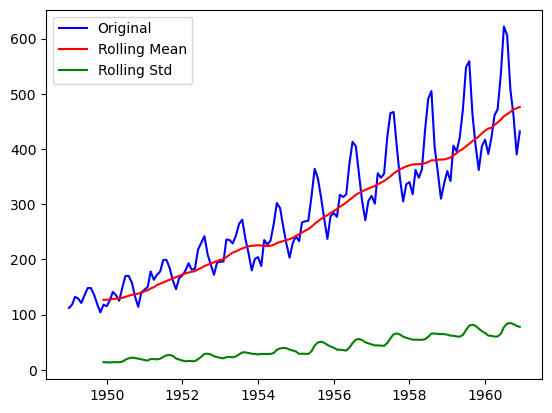

In [16]:
test_stationarity(air['Passengers'])

## Differencing

In [20]:
air['Air_Diff'] = air['Passengers'] - air['Passengers'].shift(12)
air

,Passengers,Air_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


In [22]:
air.dropna(inplace=True)
air

,Passengers,Air_Diff
Month,,
1950-01-01,115,3.0
1950-02-01,126,8.0
1950-03-01,141,9.0
1950-04-01,135,6.0
1950-05-01,125,4.0
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


Results of Dickey-Fuller Test: 

Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


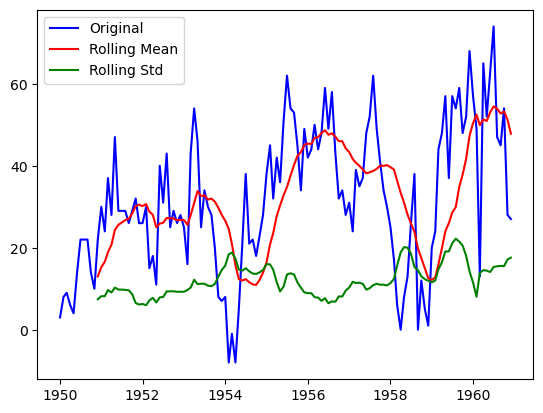

In [23]:
test_stationarity(air['Air_Diff'])

In [ ]:
Continue edeeee enu 40 min